In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from scipy.signal import savgol_filter
from bokeh.io import output_notebook, show
import matplotlib.pyplot as plt

output_notebook()

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"
pd.set_option('display.width',500)

# Save matplotlib dir
save_dir = "/home/singjc/Documents/roest_lab/publications/pyopenms_viz/supp_config_gallery/"

if pd.options.plotting.backend == "ms_bokeh":
    title_font_size = 20
    xaxis_label_font_size = 30
    yaxis_label_font_size = 30
    xaxis_tick_font_size = 28
    yaxis_tick_font_size = 28
    annotation_font_size = 20
elif pd.options.plotting.backend == "ms_matplotlib":
    title_font_size = 25
    xaxis_label_font_size = 25
    yaxis_label_font_size = 25
    xaxis_tick_font_size = 24
    yaxis_tick_font_size = 24
    annotation_font_size = 20
else:
    title_font_size = 28
    xaxis_label_font_size = 26
    yaxis_label_font_size = 26
    xaxis_tick_font_size = 24
    yaxis_tick_font_size = 24
    annotation_font_size = 24

Loading BokehJS ...

In [ ]:
# # Download test file
# import requests

# url = 'https://raw.githubusercontent.com/Roestlab/massdash/dev/test/test_data/featureMap/ionMobilityTestFeatureDf.tsv'
# file_name = 'ionMobilityTestFeatureDf.tsv'

# # Send a GET request to the URL
# response = requests.get(url)

# # Save the content of the response to a file
# with open(file_name, 'wb') as file:
#     file.write(response.content)

# print(f'File {file_name} downloaded successfully!')

# # Code to add annotation to ionMobilityTestFeatureDf data

# import pyopenms as oms

# df_ms_experiment = pd.read_csv("./ionMobilityTestFeatureDf.tsv", sep="\t")
# print(df_ms_experiment.head())

# peptide = "AFVDFLSDEIK"
# charge = 2

# seq = oms.AASequence.fromString(peptide)

# ion_annotations = ['prec', 'y4^1', 'y5^1', 'y6^1', 'y7^1', 'y8^1', 'y9^1']
# ion_ordinals = [4, 5, 6, 7, 8, 9]

# print("=" * 35)
# # print("precursor mz:", round(seq.getMZ(charge), 4))

# ion_formula = [peptide]
# ion_mz = [round(seq.getMZ(charge), 4)]
# for ion in ion_ordinals:
#     suffix = seq.getSuffix(ion) 
#     # print(f"y{ion} ion sequence: {suffix}")
#     y3_formula = suffix.getFormula(oms.Residue.ResidueType.YIon, 1)  # y3++ ion
#     # print(f"y{ion} mz: {round(suffix.getMZ(1), 4)}")
#     ion_formula.append(suffix)
#     ion_mz.append(round(suffix.getMZ(1), 4))
# annotation_df = pd.DataFrame({'Annotation':ion_annotations, 'product_mz':ion_mz, 'sequence':ion_formula})
# print(annotation_df)

# df = pd.merge(df_ms_experiment[['ms_level', 'mz', 'rt', 'im', 'int', 'precursor_mz', 'product_mz', 'Annotation']], annotation_df, on=['Annotation', 'product_mz'])
# # df['sequence'] = peptide
# # df['precursor_charge'] = charge
# df.rename(columns={'Annotation':'ion_annotation'}, inplace=True)
# df.to_csv("test_data.tsv", sep="\t", index=False)
# df

In [12]:
df = pd.read_csv("test_data.tsv", sep="\t")
print(df.head())

   ms_level          mz           rt        im         int  precursor_mz  product_mz ion_annotation     sequence
0         1  642.334187  6225.005106  0.900254   76.000460      642.3295    642.3295           prec  AFVDFLSDEIK
1         1  642.334187  6225.005106  0.969271  153.011280      642.3295    642.3295           prec  AFVDFLSDEIK
2         2  504.262011  6225.110817  0.935281   68.001520      642.3295    504.2664           y4^1         DEIK
3         2  504.262011  6225.110817  1.025902   41.000328      642.3295    504.2664           y4^1         DEIK
4         2  504.262011  6225.110817  0.926001   43.000782      642.3295    504.2664           y4^1         DEIK


# Mass Spectrum Plots

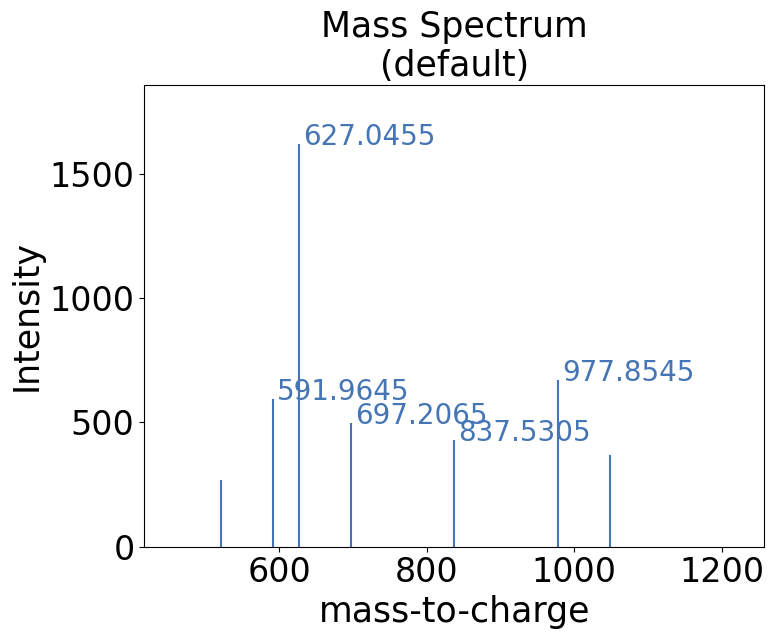

In [98]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(default)",
        grid=False, 
        height=600, width=800, 
        # annotate_top_n_peaks=5,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_default_matplotlib.png", bbox_inches='tight')

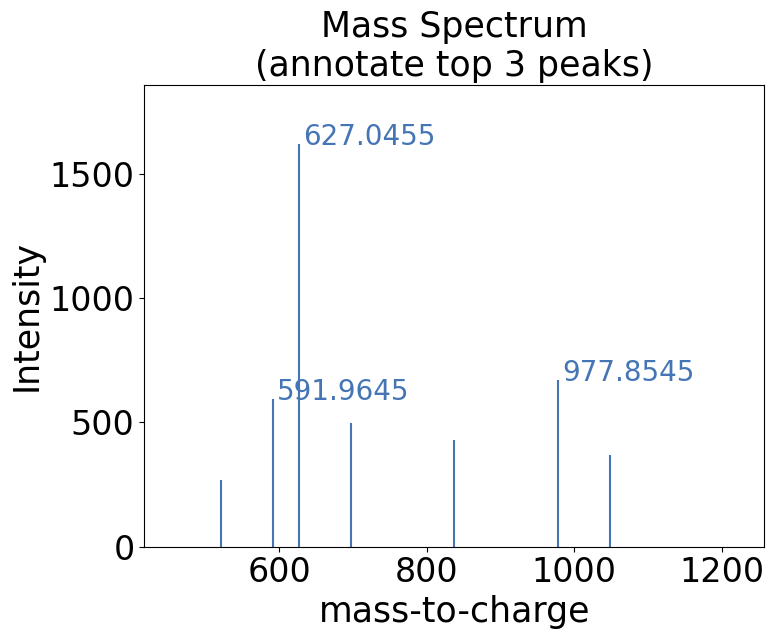

In [97]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(annotate top 3 peaks)",
        grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks=3,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_ann_top_3_matplotlib.png", bbox_inches='tight')

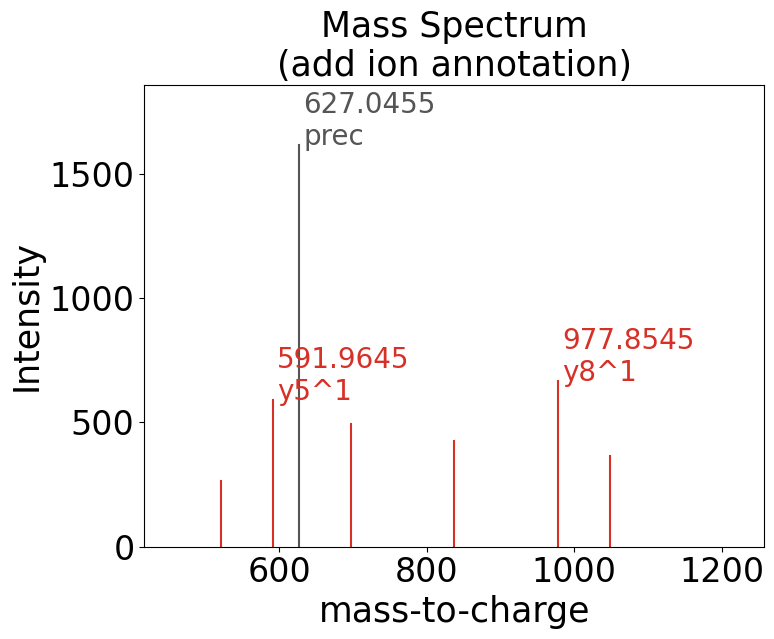

In [96]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(add ion annotation)",
        ion_annotation="ion_annotation", 
        grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks=3,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_add_ion_ann_matplotlib.png", bbox_inches='tight')

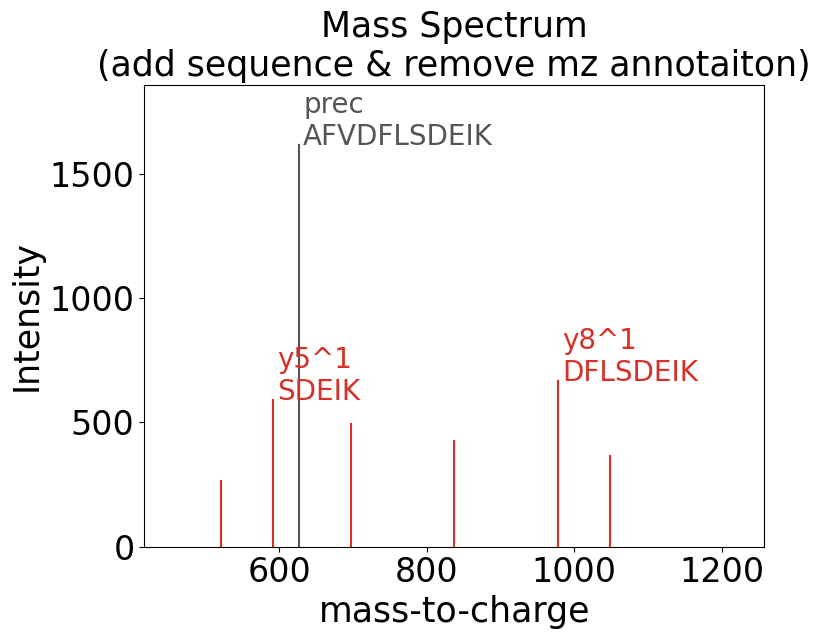

In [95]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(add sequence & remove mz annotaiton)",
        ion_annotation="ion_annotation", 
        sequence_annotation="sequence", 
        annotate_mz=False, 
            grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks=3,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_add_seq_rm_mz_ann_matplotlib.png", bbox_inches='tight')

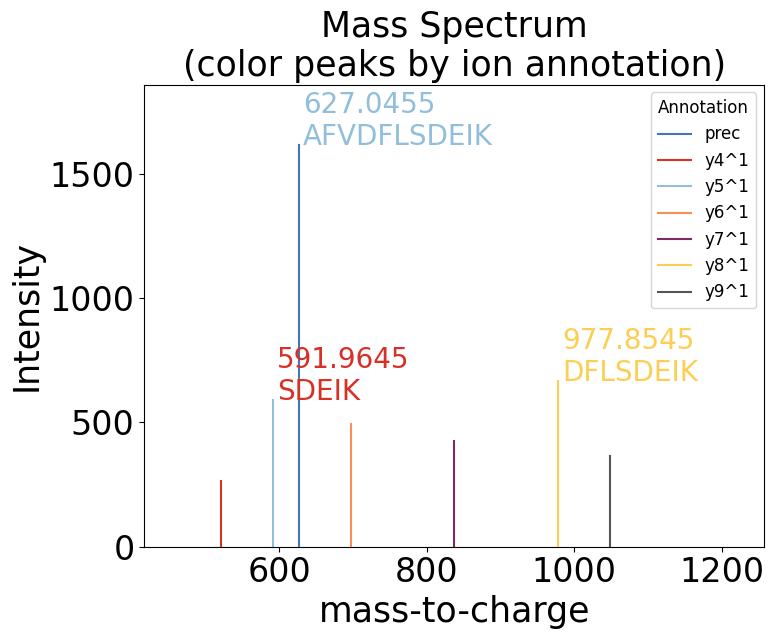

In [102]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(color peaks by ion annotation)",
        sequence_annotation="sequence", 
        by="ion_annotation",
        # annotate_mz=False, 
        grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks=3,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size,
        legend={'title':"Annotation", 'fontsize':12, 'bbox_to_anchor':(1.0, 0.75) }
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_col_peaks_by_ion_ann_matplotlib.png", bbox_inches='tight')

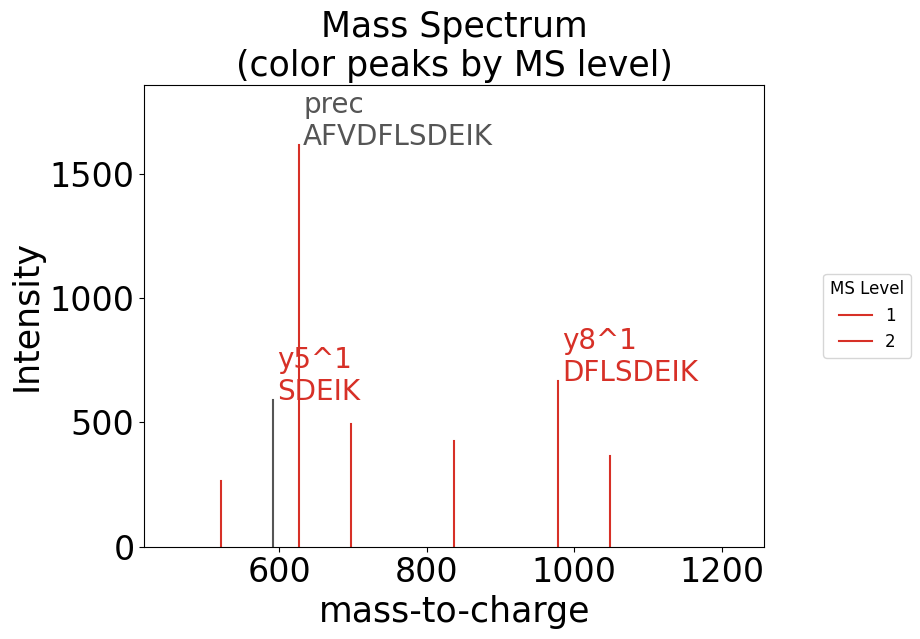

In [93]:
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(color peaks by MS level)",
        ion_annotation="ion_annotation", 
        sequence_annotation="sequence", 
        by="ms_level",
        annotate_mz=False, 
        grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks=3,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size,
        legend={'title':"MS Level", 'fontsize':12, 'bbox_to_anchor':(1.25, 0.5) }
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_col_peaks_by_ms_level_matplotlib.png", bbox_inches='tight')

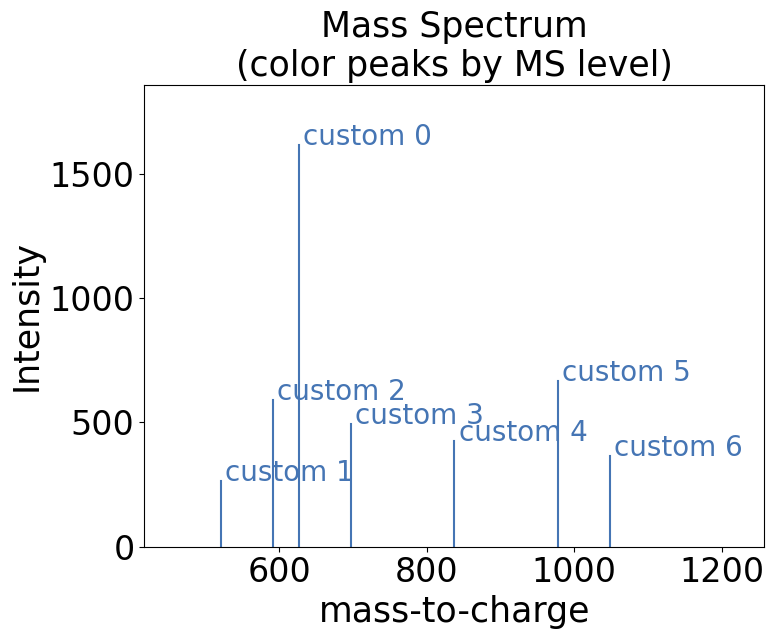

In [92]:
df['custom_annotation'] = df.groupby('ion_annotation').ngroup().apply(lambda x: f"custom {x}")
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(color peaks by MS level)",
        custom_annotation="custom_annotation", 
        annotate_mz=False, 
        grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks='all',
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size,
        legend={'title':"MS Level", 'fontsize':12, 'bbox_to_anchor':(1.25, 0.5) }
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_custom_annotation_matplotlib.png", bbox_inches='tight')

/tmp/ipykernel_2768868/1649253043.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reference_spectrum=df.groupby('ion_annotation', group_keys=False).apply(modify_intensity),


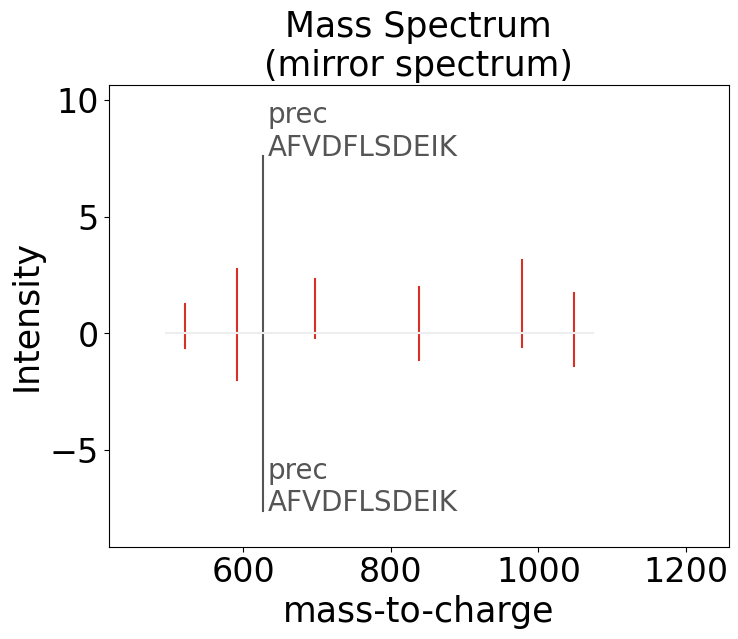

In [108]:
import numpy as np

def modify_intensity(group):
    random_percent = np.random.uniform(0.05, 1)
    group['int'] = group['int'] * (random_percent)
    return group
    
p = df.plot(kind="spectrum", x="mz", y="int", 
        title="Mass Spectrum\n(mirror spectrum)",
        ion_annotation="ion_annotation", 
        sequence_annotation="sequence", 
        reference_spectrum=df.groupby('ion_annotation', group_keys=False).apply(modify_intensity), 
        mirror_spectrum=True,
        annotate_mz=False, 
        grid=False, 
        height=600, width=800, 
        annotate_top_n_peaks=1,
        title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
        annotation_font_size = annotation_font_size
        )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/spectrum_ref_mirror_spec_matplotlib.png", bbox_inches='tight')

# Extracted Ion Chromatograms

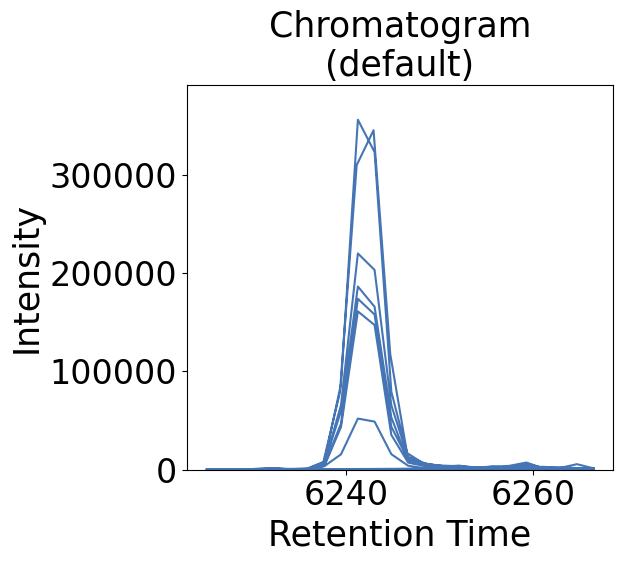

In [23]:
group_cols=['ms_level', 'ion_annotation', 'rt']
p = df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index() \
.plot(kind="chromatogram", x="rt", y="int", 
      title="Chromatogram\n(default)",
      grid=False, width=550,
     title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
     legend={'fontsize':12, 'bbox_to_anchor':(1.3, 0.5) })
# if pd.options.plotting.backend == "ms_matplotlib":
#     p.superFig.savefig(f"{save_dir}/chromatogram_default_matplotlib.png", bbox_inches='tight')

HERE


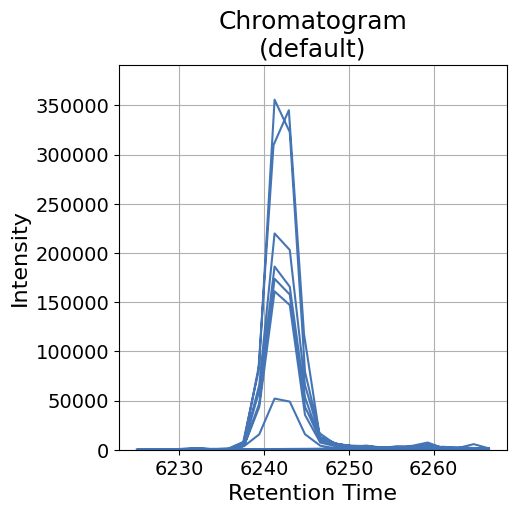

In [183]:
df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index().plot(kind="chromatogram", x="rt", y="int", 
      title="Chromatogram\n(default)")

In [187]:
df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index()

,ms_level,ion_annotation,rt,int
0,1,prec,6225.005106,229.011740
1,1,prec,6226.792950,26.001630
2,1,prec,6228.580932,57.999414
3,1,prec,6230.367189,826.008160
4,1,prec,6232.156436,1589.015244
...,...,...,...,...
163,2,y9^1,6259.292755,4355.988285
164,2,y9^1,6261.101406,1168.029872
165,2,y9^1,6262.909095,1286.014039
166,2,y9^1,6264.711573,413.995205


In [25]:
df2 = pd.read_csv("../test/test_data/ionMobilityTestChromatogramDf.tsv", sep="\t")
df2.rename(columns={'Annotation':'ion_annotation'}, inplace=True)
print(df2[(df2.ms_level==2)])
df2.plot(kind="chromatogram", x="rt", y="int", by="ms_level",
      title="Chromatogram\n(default)", backend="ms_bokeh")

     native_id  ms_level           mz           rt          int  precursor_mz  product_mz ion_annotation
1          NaN         2   504.262011  6225.110817   152.002630      642.3295    504.2664           y4^1
2          NaN         2   591.298142  6225.110817   273.003703      642.3295    591.2984           y5^1
3          NaN         2   704.384928  6225.110817    41.000973      642.3295    704.3825           y6^1
4          NaN         2   704.389080  6225.110817    41.000973      642.3295    704.3825           y6^1
5          NaN         2   851.450090  6225.110817   133.998865      642.3295    851.4509           y7^1
..         ...       ...          ...          ...          ...           ...         ...            ...
548        NaN         2  1065.535905  6266.515136  1137.512577      642.3295   1065.5463           y9^1
549        NaN         2  1065.541011  6266.515136  1137.512577      642.3295   1065.5463           y9^1
550        NaN         2  1065.546118  6266.515136  113

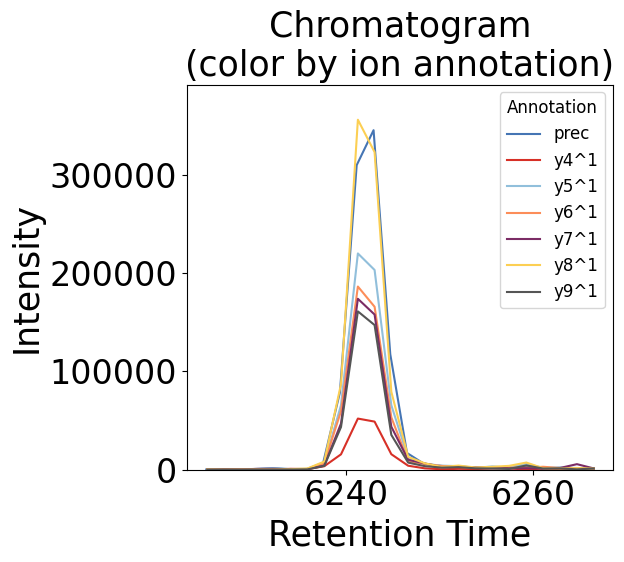

In [15]:
group_cols=['ms_level', 'ion_annotation', 'rt']
p = df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index() \
.plot(kind="chromatogram", x="rt", y="int", 
      title="Chromatogram\n(color by ion annotation)",
      by="ion_annotation",
      grid=False, width=550,
     title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
     legend={'title':'Annotation', 'fontsize':12, 'bbox_to_anchor':(1, 0.7) })
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/chromatogram_col_by_ion_ann_matplotlib.png", bbox_inches='tight')

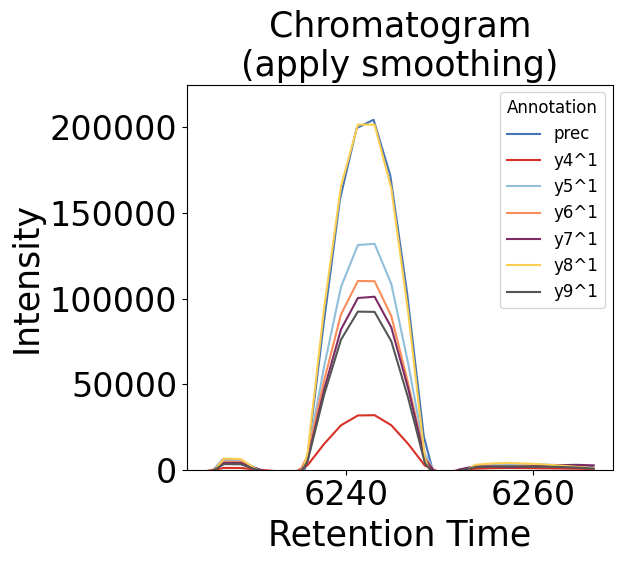

In [35]:
def apply_sgolay(group, along_col='rt', window_length=11, polyorder=4):
    # Sort the group by 'rt' to ensure correct order for smoothing
    group = group.sort_values(along_col)
    
    # Apply Savitzky-Golay filter
    group['smoothed_int'] = savgol_filter(group['int'], window_length=window_length, polyorder=polyorder)
    
    return group
    
group_cols=['ms_level', 'ion_annotation', 'rt']
p = df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index() \
.groupby(['ion_annotation', 'ms_level'])[group_cols + ['int']] \
    .apply(apply_sgolay, 
           window_length=9,
           polyorder=3) \
    .reset_index(drop=True) \
.plot(kind="chromatogram", x="rt", y="smoothed_int", 
      title="Chromatogram\n(apply smoothing)",
      by="ion_annotation",
      grid=False, width=550,
     title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
     legend={'title':'Annotation', 'fontsize':12, 'bbox_to_anchor':(1, 0.7) })
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/chromatogram_col_by_ion_ann_smoothed_matplotlib.png", bbox_inches='tight')

     leftWidth   rightWidth  apexIntensity    qvalue
0  6235.848633  6248.428223  332556.620607  0.000035


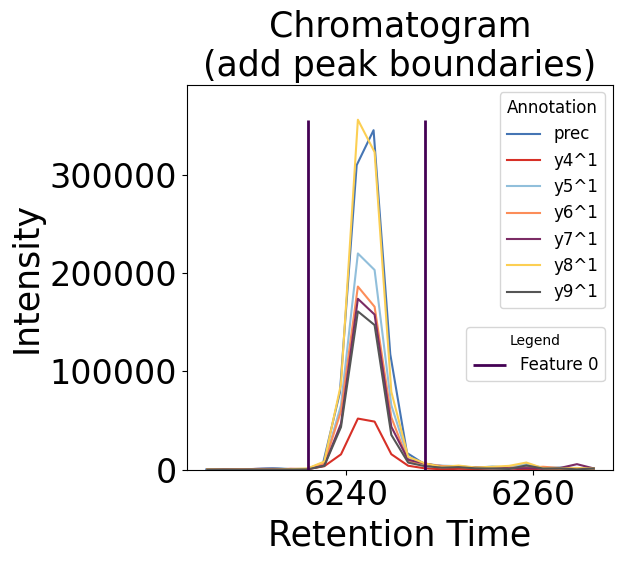

In [47]:
feat_df = pd.DataFrame({'leftWidth':6235.8486328125, 'rightWidth':6248.42822265625, 'apexIntensity':332556.620606927, 'qvalue':0.0000350840674862235}, index=[0])
print(feat_df)

group_cols=['ms_level', 'ion_annotation', 'rt']
p = df.apply(lambda x: x.fillna(0) \
          if x.dtype.kind in "biufc" \
          else x.fillna(".")) \
.groupby(group_cols)['int'].sum().reset_index() \
.plot(kind="chromatogram", x="rt", y="int", 
      title="Chromatogram\n(add peak boundaries)",
      by="ion_annotation",
      annotation_data=feat_df,
      grid=False, width=550,
     title_font_size = title_font_size,
        xaxis_label_font_size = xaxis_label_font_size,
        yaxis_label_font_size = yaxis_label_font_size,
        xaxis_tick_font_size = xaxis_tick_font_size,
        yaxis_tick_font_size = yaxis_tick_font_size,
     legend={'title':'Annotation', 'fontsize':12, 'bbox_to_anchor':(1, 0.7) },
     feature_config={'line_width':2,
                    'legend':{'fontsize':12, 'bbox_to_anchor':(1, 0.3) }})
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/chromatogram_feat_boundaries_matplotlib.png", bbox_inches='tight')

# Peak Maps

In [27]:
import numpy as np 

# df for MS experiment
df = pd.read_csv("../test/test_data/TestMSExperimentDf.tsv", sep="\t")
# Lets annotate some of these peaks with labels
#  Add label to separate peaks by an annotation
df['label'] = 'unknown'
df.iloc[ (np.ceil(df.mz) < 272)  & (np.ceil(df.mz) > 266) & \
(np.ceil(df.RT) < 237)  & (np.ceil(df.RT) > 212), 3] = "peptide 1"
df.iloc[ (np.ceil(df.mz) < 256)  & (np.ceil(df.mz) > 250) & \
(np.ceil(df.RT) < 261)  & (np.ceil(df.RT) > 230), 3] = "peptide 2"
df.groupby('label').head(2)

,RT,mz,inty,label
0,200.23254,250.11740,1314.3656,unknown
1,200.23254,250.11794,2756.8254,unknown
15127,212.05605,266.93835,1102.4032,peptide 1
15128,212.05605,267.26820,1289.9606,peptide 1
35216,230.18544,250.11794,2160.9038,peptide 2
35217,230.18544,250.11845,3678.8828,peptide 2


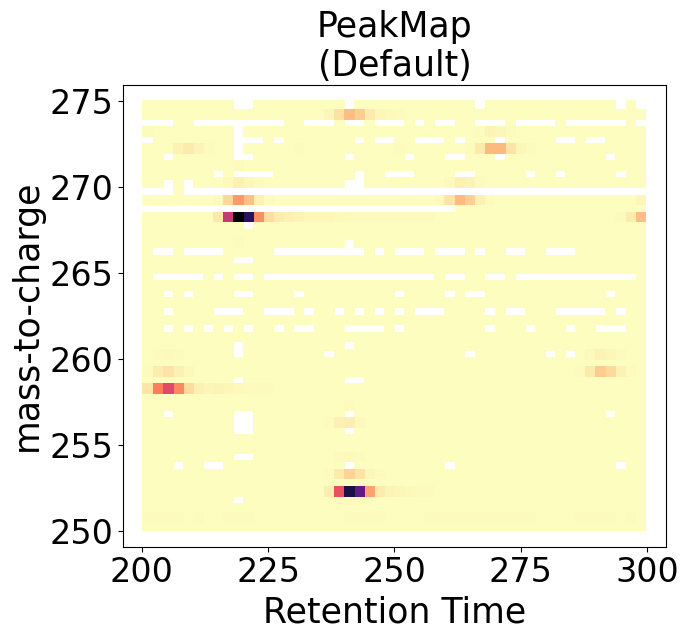

In [28]:
p = df.plot(kind="peakmap", 
        x="RT", y="mz", z="inty", marker_size=60,
        title="PeakMap\n(Default)",
        grid=False, 
            height=600, width=700,
            title_font_size=title_font_size,  
            xaxis_label_font_size=title_font_size,  
            yaxis_label_font_size=yaxis_label_font_size,  
            xaxis_tick_font_size=xaxis_tick_font_size, 
            yaxis_tick_font_size=yaxis_tick_font_size
       )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/peakmap_mz_rt_default_matplotlib.png", bbox_inches='tight')


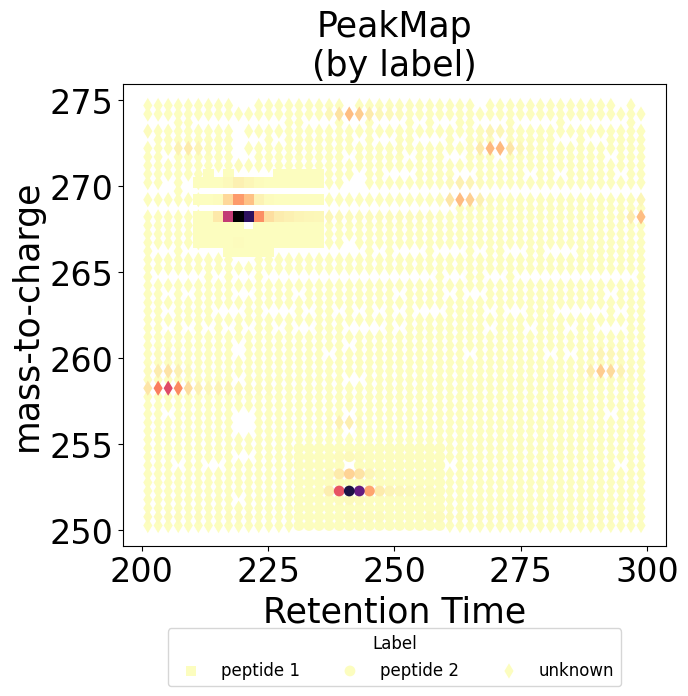

In [41]:
p = df.plot(kind="peakmap", 
        x="RT", y="mz", z='inty', 
        by="label", fill_by_z=True,
        title="PeakMap\n(by label)",
        line_color=None, marker_size=60,
        grid=False, 
        height=600, width=700,
        title_font_size=title_font_size,  
        xaxis_label_font_size=title_font_size,  
        yaxis_label_font_size=yaxis_label_font_size,  
        xaxis_tick_font_size=xaxis_tick_font_size, 
        yaxis_tick_font_size=yaxis_tick_font_size,
        legend={'title':'Label', 'fontsize':12, 'bbox_to_anchor':(0.5, -0.32), 'loc':'below', 'orientation':'horizontal'}
       )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/peakmap_mz_rt_by_ion_annotation_matplotlib.png", bbox_inches='tight')


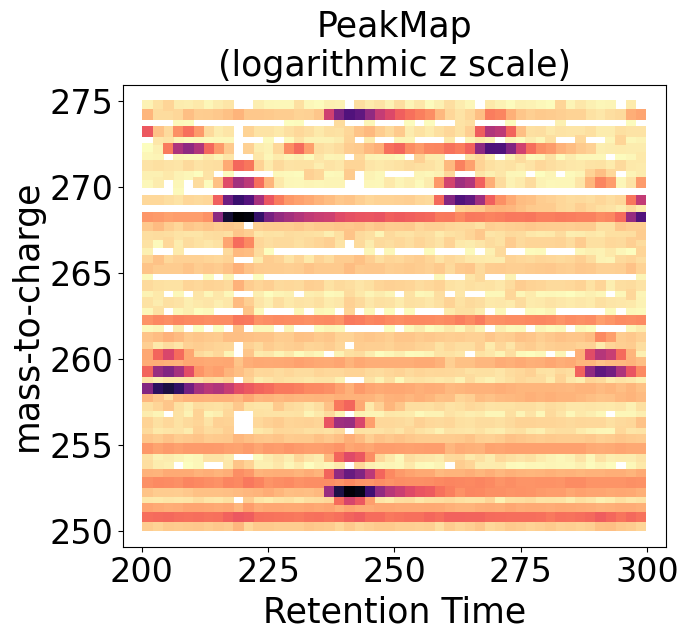

In [145]:
p = df.plot(kind="peakmap", 
        x="RT", y="mz", z="inty", 
        title="PeakMap\n(logarithmic z scale)",
        grid=False, z_log_scale=True,
            height=600, width=700,
            title_font_size=title_font_size,  
            xaxis_label_font_size=title_font_size,  
            yaxis_label_font_size=yaxis_label_font_size,  
            xaxis_tick_font_size=xaxis_tick_font_size, 
            yaxis_tick_font_size=yaxis_tick_font_size
       )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/peakmap_mz_rt_logarithmic_zscale_matplotlib.png", bbox_inches='tight')


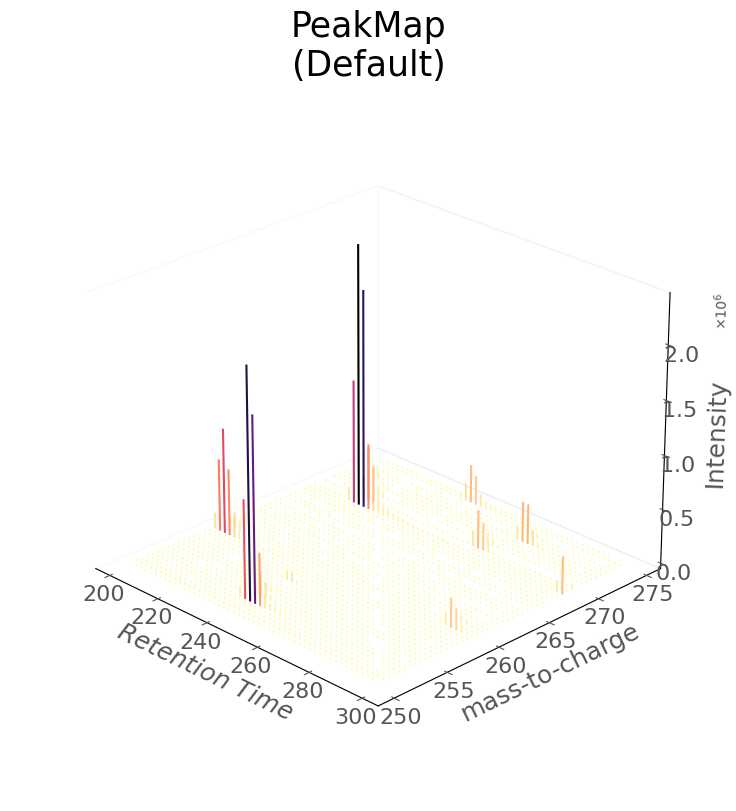

In [146]:
p = df.plot(kind="peakmap", 
        x="RT", y="mz", z="inty", 
        title="PeakMap\n(Default)",
        grid=False, plot_3d=True,
            height=800, width=800,
            title_font_size=title_font_size,  
            xaxis_label_font_size=title_font_size-7,  
            yaxis_label_font_size=yaxis_label_font_size-7,  
            xaxis_tick_font_size=xaxis_tick_font_size-8, 
            yaxis_tick_font_size=yaxis_tick_font_size-8
       )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/peakmap_mz_rt_3d_matplotlib.png", bbox_inches='tight')


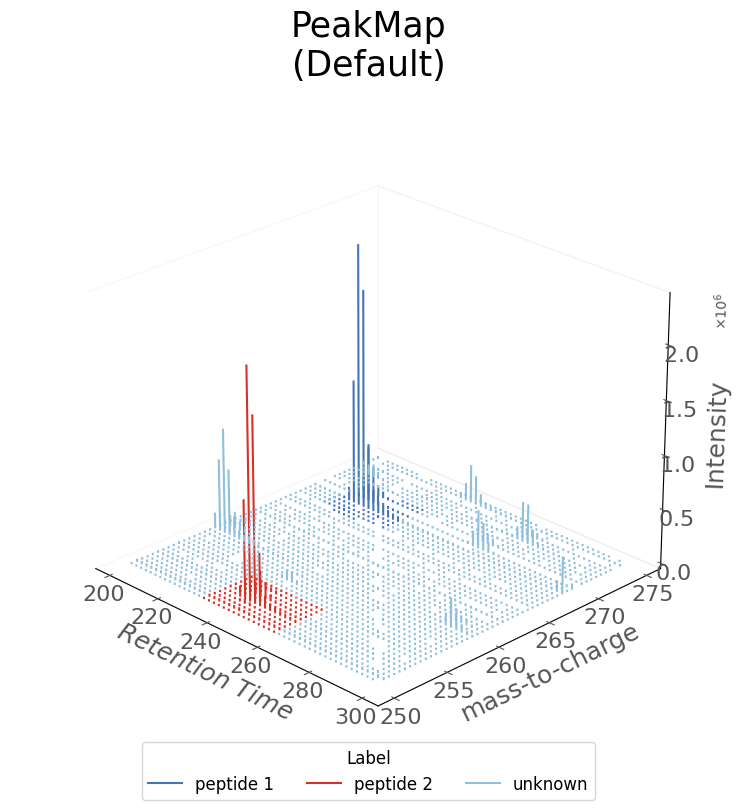

In [169]:
p = df.plot(kind="peakmap", 
        x="RT", y="mz", z="inty", 
        title="PeakMap\n(Default)",
            by="label",
        grid=False, plot_3d=True,
            height=800, width=800,
            title_font_size=title_font_size,  
            xaxis_label_font_size=title_font_size-7,  
            yaxis_label_font_size=yaxis_label_font_size-7,  
            xaxis_tick_font_size=xaxis_tick_font_size-8, 
            yaxis_tick_font_size=yaxis_tick_font_size-8,
                    legend={'title':'Label', 'fontsize':12, 'bbox_to_anchor':(0.5, -0.01), 'loc':'below', 'orientation':'horizontal'}
       )
if pd.options.plotting.backend == "ms_matplotlib":
    p.superFig.savefig(f"{save_dir}/peakmap_mz_rt_3d_by_label_matplotlib.png", bbox_inches='tight')
